# Lecture 1

### Algorithm

1. Formulate a product hypothesis
2. Select target metrics
3. Select proxy-metrics
4. Select defencive metrics
   
5. Formulate a statistic hypothesis
6. Select alfa and beta

7. Collect raw logs
8. Aggregate by user or by bucket

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


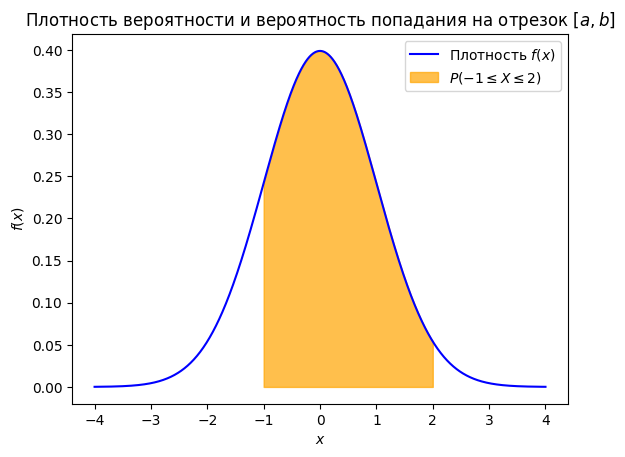

In [4]:
mu, sigma = 0, 1
a, b = -1, 2

x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y, 'b-', label='Плотность $f(x)$')

# закрасим область между a и b
x_fill = np.linspace(a, b, 100)
y_fill = stats.norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, 0, y_fill, color='orange', alpha=0.7, label=f'$P({a} \\leq X \\leq {b})$')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.title('Плотность вероятности и вероятность попадания на отрезок $[a, b]$')
plt.show()

In [5]:
# Эта функция строит плотность и распределение случайной величины
def dist_plot(dist, x, ftype = 'pdf'):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    if ftype == 'pdf':
        axes[0].plot(x, dist.pdf(x), 'b-', label='pdf')
    else: 
        axes[0].vlines(x, 0, dist.pmf(x), colors="b", lw=6, alpha=0.6, label='pmf')
    axes[0].set_title('Плотность')
    axes[0].set_xlabel('$x$')
    axes[0].set_ylabel('$f(x)$')
    axes[0].legend()

    if ftype == 'pdf':
        axes[1].plot(x, dist.cdf(x), 'orange', label='cdf')
    else: 
        axes[1].step(x, dist.cdf(x), where="mid", color="orange", lw=3, label='cdf')
    axes[1].set_title('Функция распределения')
    axes[1].set_xlabel('$x$')
    axes[1].set_ylabel('$F(x)$')
    axes[1].legend()
    plt.tight_layout()
    plt.show()

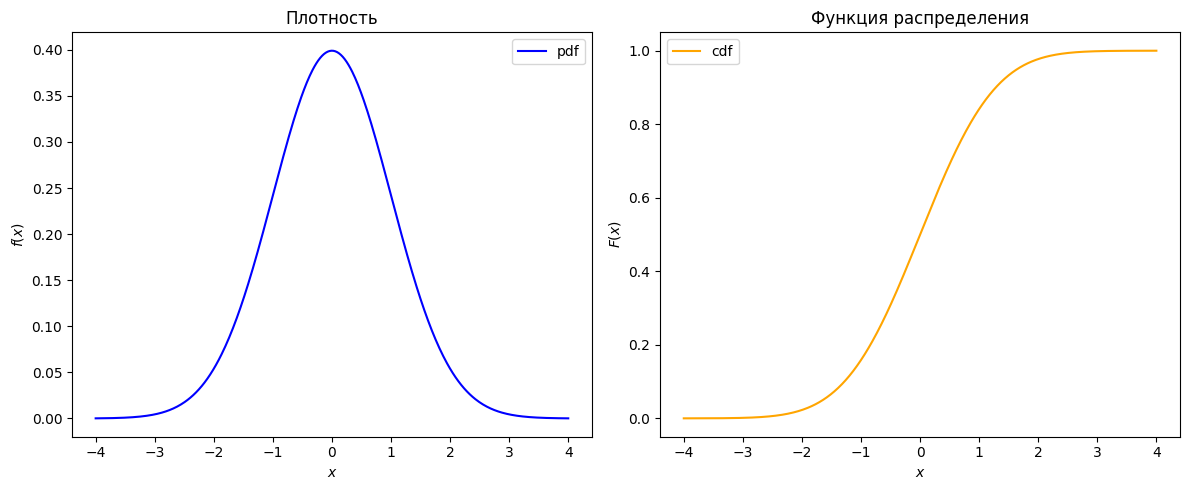

In [6]:
x = np.linspace(-4, 4, 500)
mu, sigma = 0, 1
dist = stats.norm(loc=mu, scale=sigma)
dist_plot(dist, x)

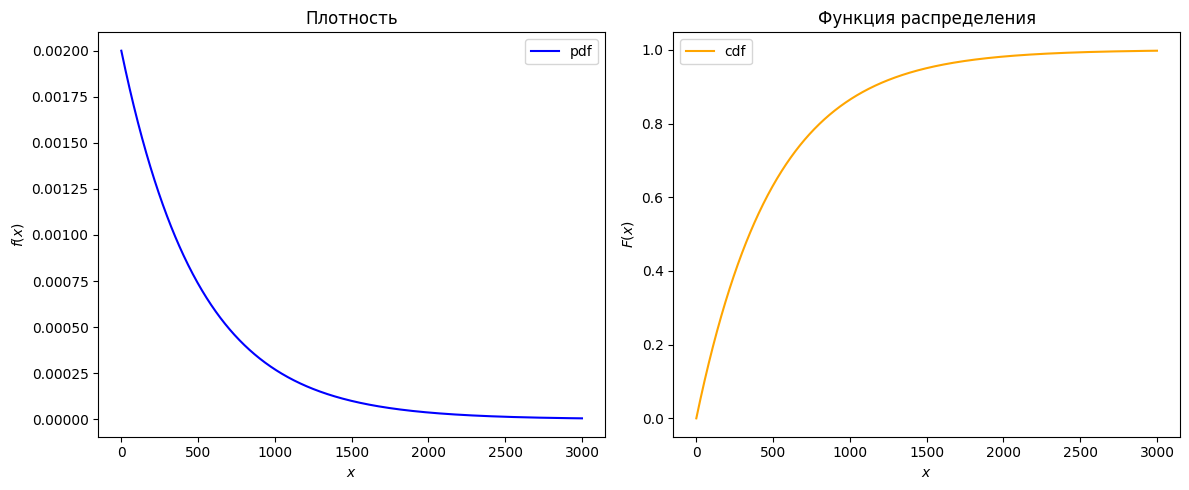

In [7]:
x = np.linspace(0, 3000, 1000)
mean = 500
lamb = 1 / mean
dist = stats.expon(scale=mean)
dist_plot(dist, x)

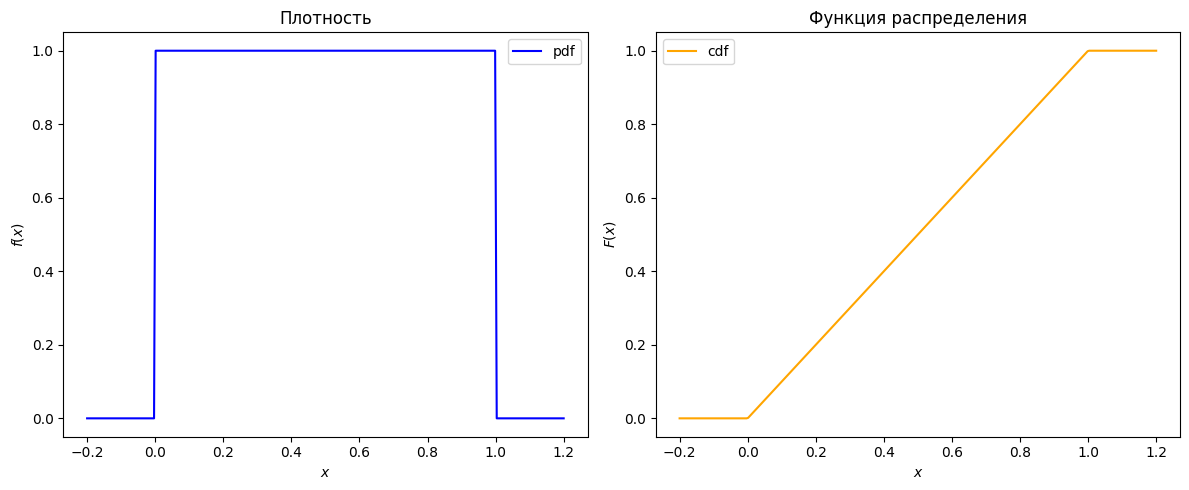

In [8]:
x = np.linspace(-0.2, 1.2, 300)
mu, sigma = 0, 1
dist = stats.uniform(loc=mu, scale=sigma)
dist_plot(dist, x)

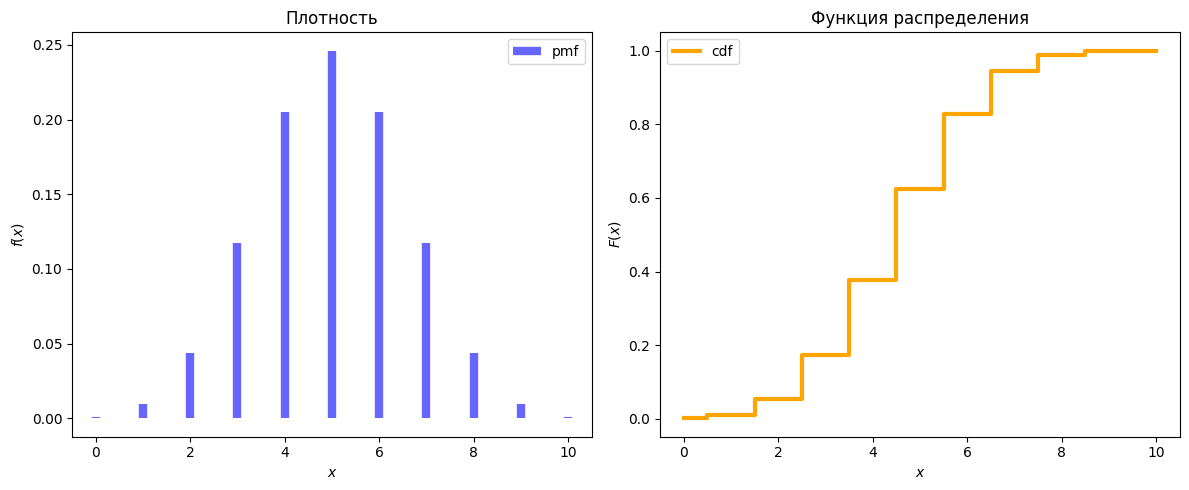

In [9]:
x = np.arange(0, 11)
dist = stats.binom(n=10, p=0.5)
dist_plot(dist, x, ftype = 'pmf')

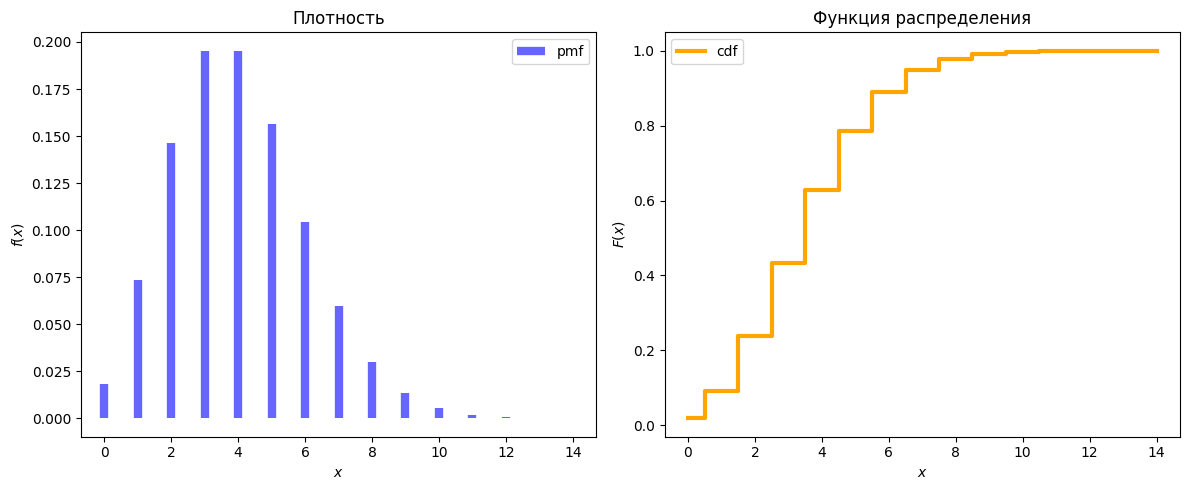

In [10]:
x = np.arange(0, 15)
lmbda = 4
dist = stats.poisson(lmbda)
dist_plot(dist, x, ftype = 'pmf')

In [11]:
# Параметры нормального распределения
mu = 10      # матожидание (истинное)
sigma2 = 3  # дисперсия (истинное)
sigma = np.sqrt(sigma2)

# Диапазон размеров выборки
sample_sizes = np.arange(5, 1001, 5)  # от 5 до 1001, шаг 5
M = 10000  # число симуляций на каждое n

mean_estimates = []
unbiased_var_estimates = []

for n in sample_sizes:
    samples = stats.norm.rvs(mu, sigma, (M, n))
    means = np.mean(samples)
    unbiased_vars = samples.var(axis=1, ddof=1)  # несмещенная оценка!
    mean_estimates.append(means.mean())
    unbiased_var_estimates.append(unbiased_vars.mean())
    
mean_estimates = np.array(mean_estimates)
unbiased_var_estimates = np.array(unbiased_var_estimates)



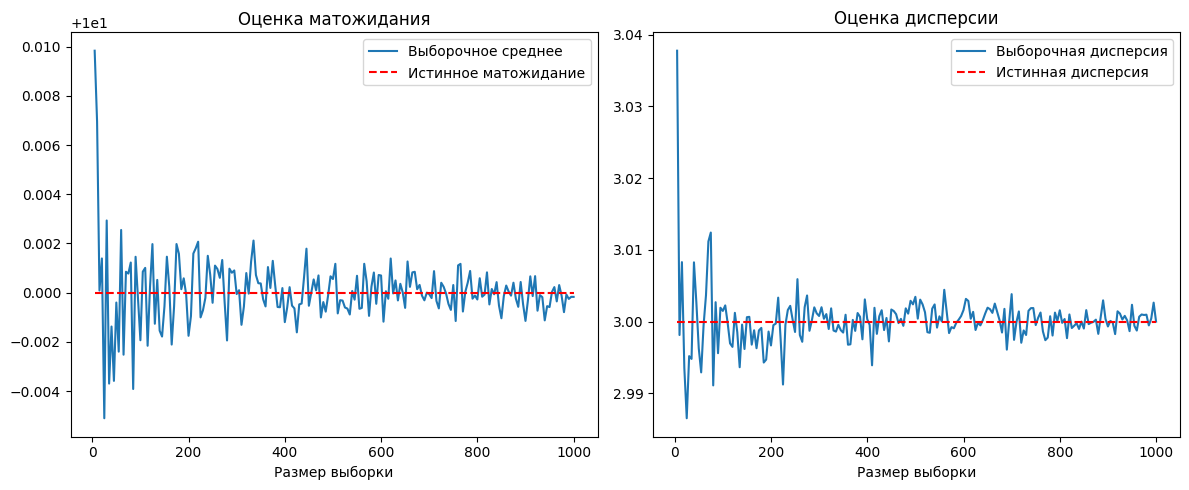

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(sample_sizes, mean_estimates, label="Выборочное среднее")
plt.hlines(mu, sample_sizes[0], sample_sizes[-1], colors='red', linestyles='dashed', label='Истинное матожидание')
plt.xlabel('Размер выборки')
plt.title("Оценка матожидания")
plt.legend()


plt.subplot(1,2,2)
plt.plot(sample_sizes, unbiased_var_estimates, label="Выборочная дисперсия")
plt.hlines(sigma2, sample_sizes[0], sample_sizes[-1], colors='red', linestyles='dashed', label='Истинная дисперсия')
plt.xlabel('Размер выборки')
plt.title("Оценка дисперсии")
plt.legend()

plt.tight_layout()
plt.show()

In [16]:

# Параметры настоящего распределения
mu = 0
sigma = 2  

n_list = np.arange(5, 1001, 5)
M = 10000  # число симуляций на каждое n

empirical_vars = []
empirical_means_of_vars = []

for n in n_list:
    # Симулируем M выборок размера n из N(mu, sigma^2)
    samples = stats.norm.rvs(loc=mu, scale=sigma, size=(M, n))
    # Для каждой выборки считаем несмещённую выборочную дисперсию
    unbiased_vars  = samples.var(axis=1, ddof=1)
    # Считаем выборочную дисперсию оценок S^2 (эмпирическую)
    var_s2 = np.var(unbiased_vars, ddof=1)
    mean_s2 = np.mean(unbiased_vars)
    empirical_vars.append(var_s2)
    empirical_means_of_vars.append(mean_s2)


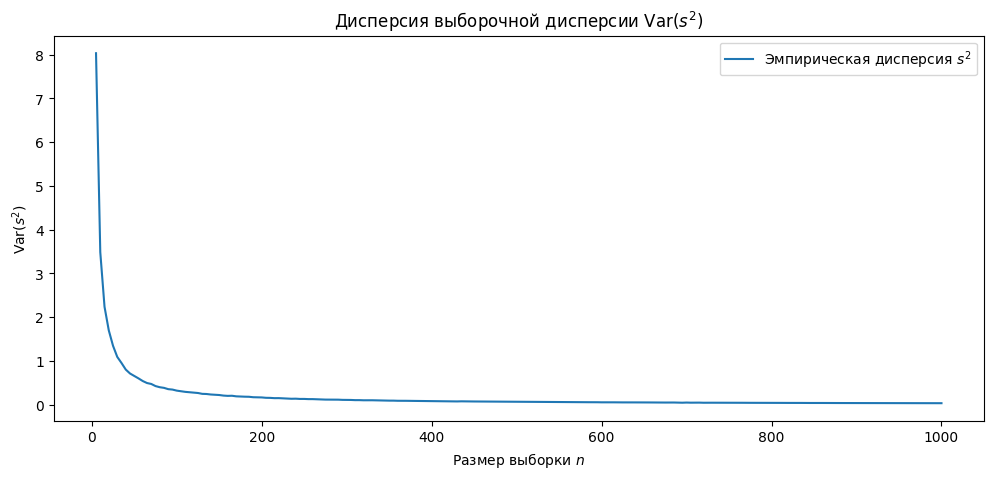

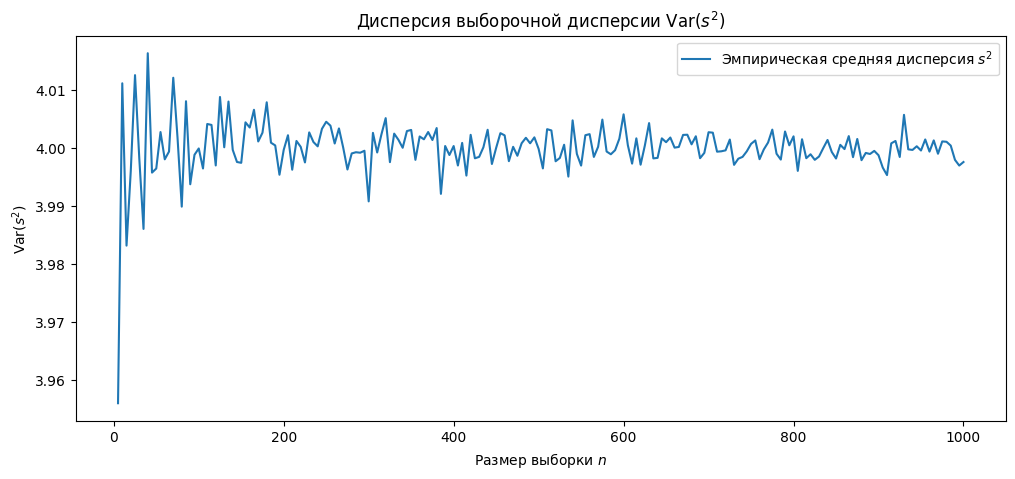

In [17]:
plt.figure(figsize=(12,5))
plt.plot(n_list, empirical_vars, '-', label='Эмпирическая дисперсия $s^2$')
plt.xlabel('Размер выборки $n$')
plt.ylabel(r'$\mathrm{Var}(s^2)$')
plt.title(r'Дисперсия выборочной дисперсии $\mathrm{Var}(s^2)$')
plt.legend()
plt.show()



plt.figure(figsize=(12,5))
plt.plot(n_list, empirical_means_of_vars, '-', label='Эмпирическая средняя дисперсия $s^2$')
plt.xlabel('Размер выборки $n$')
plt.ylabel(r'$\mathrm{Var}(s^2)$')
plt.title(r'Дисперсия выборочной дисперсии $\mathrm{Var}(s^2)$')
plt.legend()
plt.show()